# Trabajo Practico N1 - Problema de clasificacion y regresion.

Autor: Francisco Ledesma

### Attribute Information:

- RMSD-Size of the residue.
- F1 - Total surface area.
- F2 - Non polar exposed area.
- F3 - Fractional area of exposed non polar residue.
- F4 - Fractional area of exposed non polar part of residue.
- F5 - Molecular mass weighted exposed area.
- F6 - Average deviation from standard exposed area of residue.
- F7 - Euclidian distance.
- F8 - Secondary structure penalty.
- F9 - Spacial Distribution constraints (N,K Value)

In [19]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import learning_curve
import numpy as np


In [20]:
columns = ["RMSD","F1","F2","F3","F4","F5","F6","F7","F8","F9"]
df = pd.read_csv("CASP.csv")

In [21]:
df.describe()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,4.573000e+04,45730.000000,45730.000000,45730.000000,45730.000000
mean,7.748528,9871.596995,3017.367175,0.302392,103.492433,1.368299e+06,145.638061,3989.755990,69.975071,34.523664
std,6.118312,4058.138034,1464.324663,0.062886,55.424985,5.640367e+05,69.999230,1993.574575,56.493443,5.979755
min,0.000000,2392.050000,403.500000,0.092500,10.310100,3.194902e+05,31.970400,0.000000,0.000000,15.228000
25%,2.305000,6936.680000,1979.045000,0.258740,63.563900,9.535912e+05,94.757500,3165.322500,31.000000,30.424725
50%,5.030000,8898.805000,2668.155000,0.300150,87.740800,1.237219e+06,126.176000,3840.170000,54.000000,35.299300
75%,13.379000,12126.150000,3786.410000,0.342890,133.646750,1.690920e+06,181.468500,4644.192500,91.000000,38.870800
max,20.999000,40034.900000,15312.000000,0.577690,369.317000,5.472011e+06,598.408000,105948.170000,350.000000,55.300900


In [22]:
features = columns[1:]
target = 'RMSD'

In [23]:
input = df[features]
output = df[target]

In [24]:
seed = (-1)*80538738812075974**3 + 80435758145817515**3 + 12602123297335631**3
input_train, input_test,output_train, output_test = train_test_split(input,output, test_size=0.3, random_state=seed)

In [25]:
regr = linear_model.LinearRegression()

In [26]:
regr.fit(input_train, output_train)

LinearRegression()

In [27]:
output_pred = regr.predict(input_test)

Analizando el dataset como viene sin tener en cuenta EDA se obtienen los siguientes resultados.

In [28]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(output_test, output_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(output_test, output_pred))

Coefficients: 
 [ 1.67523149e-03  1.40033970e-03  1.82525088e+01 -1.08062674e-01
 -4.70064715e-06 -2.39016151e-02 -1.64317884e-04  1.52408263e-02
 -1.05161145e-01]
Mean squared error: 27.10
Coefficient of determination: 0.28


### A continuacion se busca mejorar la performance del predictor.

### Normalizando los valores del dataset

In [29]:
df_rmsd= df['RMSD']
df = df.drop(columns='RMSD')
df = (df-df.mean())/df.std()
df = pd.concat([df,df_rmsd],axis=1)
input = df[features]
output = df[target]
input_train, input_test,output_train, output_test = train_test_split(input,output, test_size=0.3, random_state=seed)
regr = linear_model.LinearRegression()
regr.fit(input_train, output_train)
output_pred = regr.predict(input_test)
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(output_test, output_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(output_test, output_pred))

Coefficients: 
 [ 6.79832064  2.05055196  1.14782424 -5.98937203 -2.65133745 -1.67309466
 -0.32757996  0.86100675 -0.62883793]
Mean squared error: 27.10
Coefficient of determination: 0.28


se observa que al normalizar, la metrica MSE no cambia

### Curvas de aprendizaje

In [30]:
def learning_curves(estimator, X, y):
    train_sizes, train_scores, test_scores,fit_times,score_times = learning_curve(estimator, X, y,
                                                                                    scoring ='neg_mean_squared_error',
                                                                                    random_state=42,
                                                                                    train_sizes=np.linspace(0.1, 1.0, 100),
                                                                                    return_times=True)

    train_scores_mean = -train_scores.mean(axis = 1)
    test_scores_mean = -test_scores.mean(axis = 1)

    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, test_scores_mean, label = 'test error')

    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 18, y = 1.03)
    print('best train size percent:',(train_sizes[np.argmin(train_scores_mean)]/len(X))*100,'%')
    plt.legend()
    plt.grid()
    plt.show()
    
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    plt.grid()
    plt.plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    plt.xlabel("fit_times")
    plt.ylabel("MSE")
    plt.title("Performance of the model")

Se grafica como es el MSE en funcion del tamaño del dataset y el tiempo que demora en hacer el fit.

best train size percent: 42.180188060354254 %


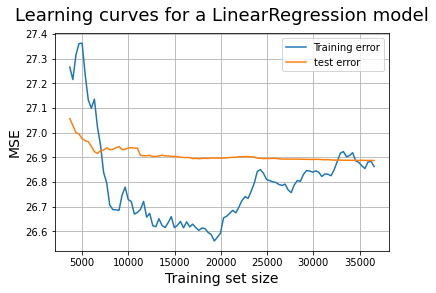

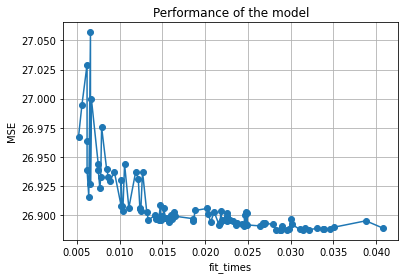

In [31]:
learning_curves(estimator=linear_model.LinearRegression(), X=input, y=output)

Se observa que en el caso de normalizar la entrada no se obtiene una mejora en el MSE sino en el tiempo que demora el fit

best train size percent: 42.180188060354254 %


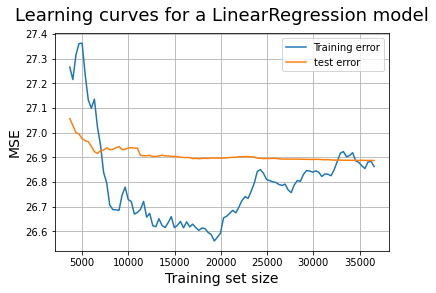

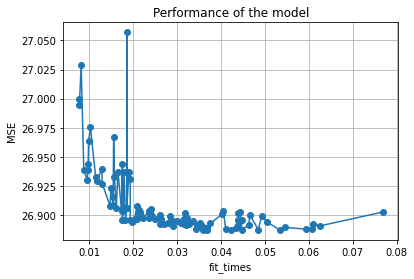

In [32]:
input_norm = (input - input.mean())/input.std()
learning_curves(estimator=linear_model.LinearRegression(), X=input_norm, y=output)

### Elimino el feature F5 debido a que en el EDA se aprecia que tiene una fuerte correlacion con F1 y probablemente no aporte informacion.

In [33]:
bad_col = ["F5"]
df = df.drop(bad_col, axis=1) #Elimino las conflictivas...
for col in bad_col:
    columns.remove(col)
features = columns[1:]
target = 'RMSD'
input = df[features]
output = df[target]
input_train, input_test,output_train, output_test = train_test_split(input,output, test_size=0.3, random_state=seed)
regr = linear_model.LinearRegression()
regr.fit(input_train, output_train)
output_pred = regr.predict(input_test)
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(output_test, output_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(output_test, output_pred))

Coefficients: 
 [ 3.90549468  2.16078031  1.10580568 -5.93348126 -1.54787225 -0.32617782
  0.88654474 -0.58636628]
Mean squared error: 27.10
Coefficient of determination: 0.28


Efectivamente, no mejoro

### Aplico Feature Engineering
Busco aplicar features polinomiales de distinto orden para encontrar correlaciones no lineales entre las variables

### orden 2

In [34]:
poly = PolynomialFeatures(2,include_bias=False)
input = df[features]
output = df[target]
input = poly.fit_transform(input,)
input_train, input_test,output_train, output_test = train_test_split(input,output, test_size=0.3, random_state=seed)
regr = linear_model.LinearRegression()
regr.fit(input_train, output_train)
output_pred = regr.predict(input_test)
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(output_test, output_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(output_test, output_pred))

Coefficients: 
 [-9.46133286e+02  1.13790924e+03 -4.80317626e+02 -7.12089533e+00
 -2.29645368e+00 -6.14644758e-01  1.40883314e+00 -5.33694965e-01
  4.28237625e+00  9.23765095e-01 -2.00253395e+02 -3.29550133e+00
 -8.31880478e+00  2.55937714e-01 -1.49866842e+00 -2.92382146e+00
 -3.72754427e-01  1.29285846e+00  1.94071707e+00 -2.47972172e+00
  2.80677309e-01  5.61870730e-01  1.38044927e+00 -2.83483615e-01
 -1.26011889e+00  1.99133037e+00  1.74471230e-01 -4.58683779e-01
 -1.53289484e+00  3.87860736e-02  1.76217568e+00  5.94932554e-01
  1.13408730e+00 -5.01861471e-01  5.23846576e+00 -1.02889622e+00
  1.23897044e+00  2.11669707e+00  1.80171952e-02 -3.04522654e-01
 -7.63274456e-02 -9.19029397e-01  2.42643545e-01 -1.27094064e-01]
Mean squared error: 24.22
Coefficient of determination: 0.35


### orden 3

In [35]:
poly = PolynomialFeatures(3,include_bias=False)
input = df[features]
output = df[target]
input = poly.fit_transform(input,)
input_train, input_test,output_train, output_test = train_test_split(input,output, test_size=0.3, random_state=seed)
regr = linear_model.LinearRegression()
regr.fit(input_train, output_train)
output_pred = regr.predict(input_test)
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(output_test, output_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(output_test, output_pred))

Coefficients: 
 [ 1.78554068e+02 -2.20125236e+02  5.28857842e+01 -1.00655537e+02
  7.53220790e+01  1.81704893e+02  1.53307715e-01  3.44523854e+01
 -7.33320606e+02  2.42086888e+03  6.41051884e+02  3.52185588e+03
 -2.95629473e+03 -6.96392808e+03  6.82543019e+01 -1.29899401e+03
 -1.82532515e+03 -4.04432917e+02 -4.20766555e+03  3.49919786e+03
  8.31293428e+03 -8.12514234e+01  1.55075570e+03  4.99980868e+02
  1.78213296e+03 -1.48304889e+03 -3.52114859e+03  3.42936668e+01
 -6.58285009e+02  1.98666473e+00 -9.00646975e-01  2.96251898e+00
  1.35645933e+00 -1.89512357e+00  1.44801510e+01 -4.41638277e+00
  7.75139976e-01  3.72207224e+00  1.57787485e-01 -1.46706054e+00
  4.60352857e-01 -1.52024492e+00  2.33083974e-01  9.16294366e-01
 -2.02450912e+01  2.39985588e+01 -1.69551664e+02  1.53556237e+01
  2.02806744e+01 -6.68756524e+00  5.43077483e-02 -1.17820647e+01
  2.28875692e+00  3.14866980e+02 -1.58358106e+01 -3.49336394e+01
  7.29371895e+00  1.26270492e+00  1.86705469e+01  2.06057989e+02
  7.51474

Se concluye que realizando el feature polinomial de orden 2 mejora el MSE, pero a partir de orden 3 se comienza a tener problema de overfitting